# Выявление закономерностей, определяющих успешность компьютерной игры

# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных
Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

##  Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовьте данные

In [4]:
data.columns = data.columns.str.lower() # приведем названия столбцов к нижнему регистру
data.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


In [5]:
print(data.isna().sum())
# Найдем пропуски в столбцах

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Удалим пропуски в столбцах year_of_release и name, т.к адекватно заполнить эти данные мы не можем. Их не так много, на анализ данных удаление не повлияет

In [6]:
data = data.dropna(subset=['year_of_release'])
data = data.dropna(subset=['name'])

In [7]:
data['rating'] = data['rating'].fillna('Unknown')
# Заполняем пропуски заглушкой Unknown в rating

In [8]:
data['year_of_release'] = data['year_of_release'].astype('int')
# Так как год у нас целое число, поэтому желательно избавиться от плавающей точки и поменять тип данных с float на int

In [9]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

В столбце user_score видим аббревиатуру "tbd" это означает to be defined т.е игра еще не оценена достаточным количеством пользователей. Заменим их на пустые значения NaN

In [10]:
data.loc[(data['user_score'] == 'tbd'), 'user_score'] = np.NaN
data['user_score'] = data['user_score'].astype('float') # Поменяем тип данных с object на float

In [11]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
# Посчитаем суммарные продажи во всех регионах и добавим в таблицу столбец с их суммой

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Причины пропусков в данных:

Пропуски могут возникнуть в результате ошибки ввода данных, нежелания вводить эти данные, или технического фактора (например, ошибка при выгрузке).

Например, в столбце year_of_release есть пропуски, т.к возможно не был известен год релиза игры.

Пропуски в колонках с оценками и рейтингом игр прослеживаются в зависимости от года релиза игры. Скорее всего присваивать рейтинг игр начали с определённого года, и раньше рейтинг просто не ставили.

In [13]:
data.duplicated().sum()

0

Явные дубликаты не обнаружены

## Проведите исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы

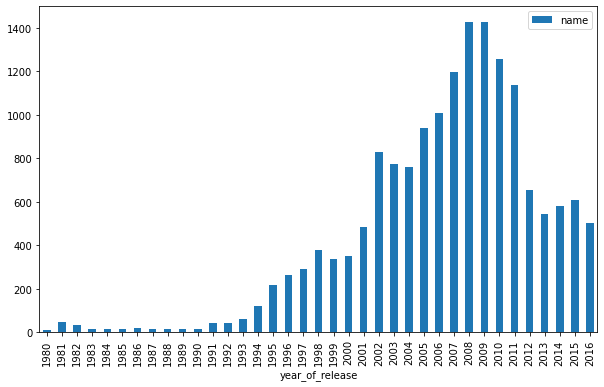

In [14]:
data.pivot_table(index ='year_of_release', values = 'name', aggfunc='count').plot(kind='bar', figsize = (10,6));

По графику мы видим что количество выпускаемых игр в год росло с 1980 по 2008 год, после начался спад.

### Посмотрите, как менялись продажи по платформам

In [15]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
# Найдем топ 10 платформ по продажам

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

In [16]:
top = data.query('platform == ("PS2", "X360", "PS3", "Wii", "DS", "PS", "PS4", "GBA", "PSP", "3DS")') # Перезапишем фрейм только с топ 10 платформ
top_platform_sales = top.pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum')
top_platform_sales
# Выберем из топ 10 платформы с наибольшими суммарными продажами по годам

total_sales
platform year_of_release             
3DS      2011                   63.20
         2012                   51.36
         2013                   56.57
         2014                   43.76
         2015                   27.78
...                               ...
X360     2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52

[97 rows x 1 columns]

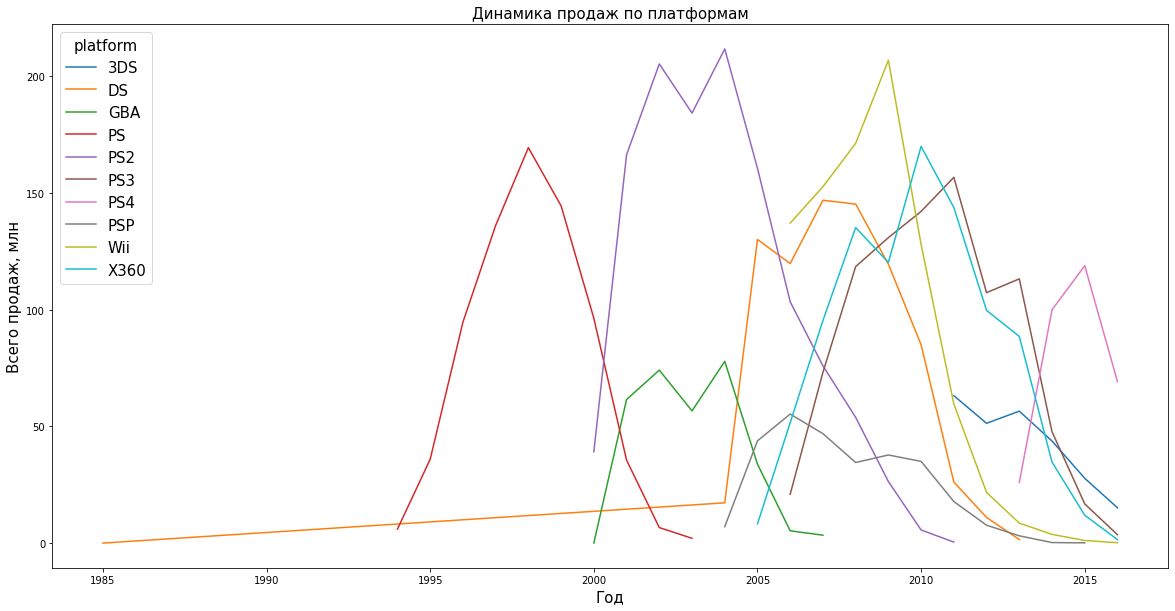

In [17]:
plt.figure(figsize=(20,10)) 
ax = sns.lineplot(data=top_platform_sales, y= 'total_sales', x = 'year_of_release', hue='platform')
ax.set_title('Динамика продаж по платформам', fontsize = 15)
ax.set_ylabel('Всего продаж, млн', fontsize = 15)
ax.set_xlabel('Год', fontsize = 15)
plt.legend(title='platform', fontsize='15', title_fontsize='15')
# Построим график распределения продаж по годам

Судя по графику, можно сказать что, цикл жизни платформ в среднем стоставляет около 10 лет. Компании создают платформу, выпускают игры под них, через некоторое время компания-создатель платформы делает платформу лучше, перестаёт выпускать игры для старой и делает для новой. Соответственно старая платформа, можно сказать, умирает.

### Какие платформы лидируют по продажам, растут или падают?

In [18]:
data = data[data['year_of_release'] > 2012]
# Далее будем учитывать данные за актуальный период с 2013 по 2016 год

<AxesSubplot:title={'center':'Распределение продаж по платформам и годам'}, xlabel='year_of_release'>

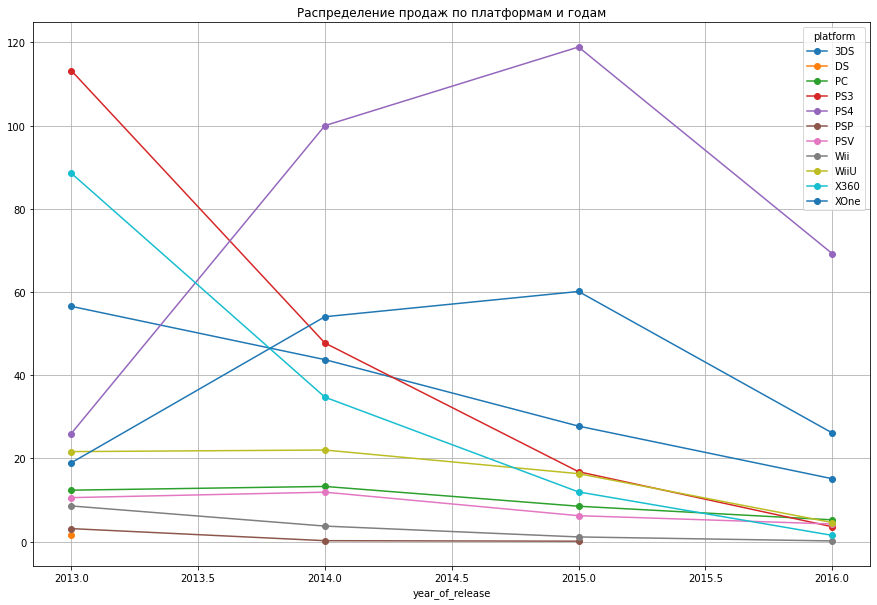

In [19]:
data.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(grid=True, style='o-',title='Распределение продаж по платформам и годам', figsize=(15, 10))
# Построим график распределения прадаж платформ по годам


Согласно графику мы видим что платформы PS4 и XOne лидируют по продажам по состоянию на 2015 год их продажи только растут из года в год и PS4 обгоняет XOne по продажам почти в 2 раза. (так как данные за 2016 год могут быть неполными, его мы не будем пока учитывать)

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам

Text(0, 0.5, 'Глобальные продажи')

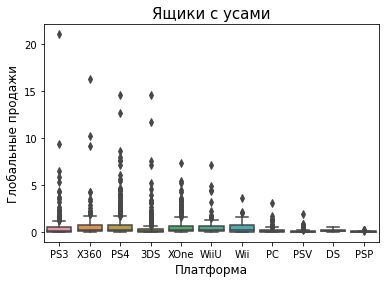

In [20]:
sns.boxplot(data=data, x='platform', y='total_sales')
plt.title('Ящики с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

На первом графике видны выбросы и редкие значения, обрежем усы на втором графике

Text(0, 0.5, 'Глобальные продажи')

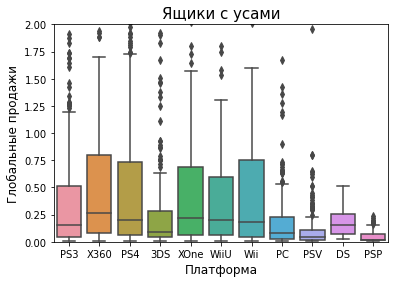

In [21]:
plt.ylim([0,2])
sns.boxplot(data=data, x='platform', y='total_sales')
plt.title('Ящики с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

По графику "ящик с усами" видим распределение глобальных продаж игр по платформам. Можно выделить 4 самых продаваемых платформы: X360, PS4, XOne, Wii.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

In [22]:
# В качестве самой популярной платформы возьмем PS4
PS4 = top.query('platform == "PS4"')

In [23]:
# Посчитаем коэффициент корреляции для оценок пользователей
PS4['total_sales'].corr(PS4['user_score'])

-0.031957110204556376

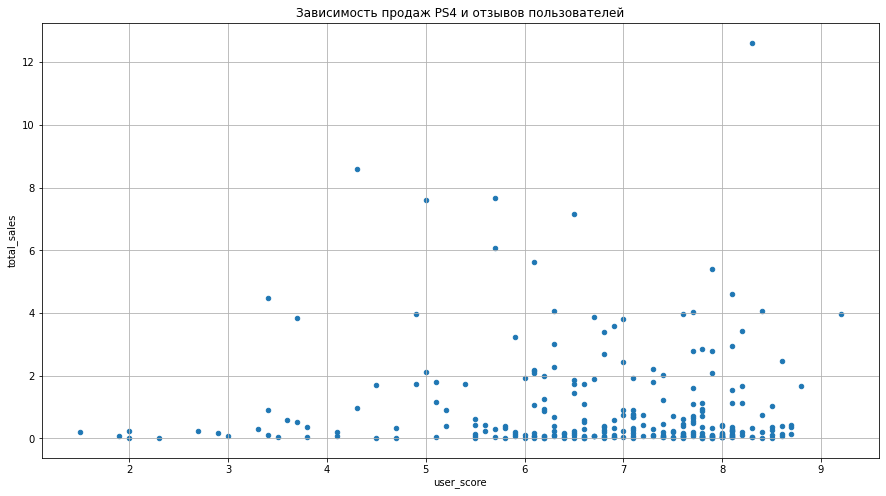

In [24]:
# Построим диаграмму рассеяния
PS4.plot(x='user_score', y='total_sales', kind='scatter', figsize = (15,8), grid=True, title='Зависимость продаж PS4 и отзывов пользователей');

Коэффициент корреляции отрицательный и равен -0.031. Т.е взаимосвязь практически отсутствует.

In [25]:
# Посчитаем коэффициент корреляции для оценок критиков
PS4['total_sales'].corr(PS4['critic_score'])

0.406567902061781

Коэффициент корреляции положительный и равен 0.4. Зависимость есть, но она слабая.

<AxesSubplot:title={'center':'Зависимость продаж PS4 и отзывов критиков'}, xlabel='critic_score', ylabel='total_sales'>

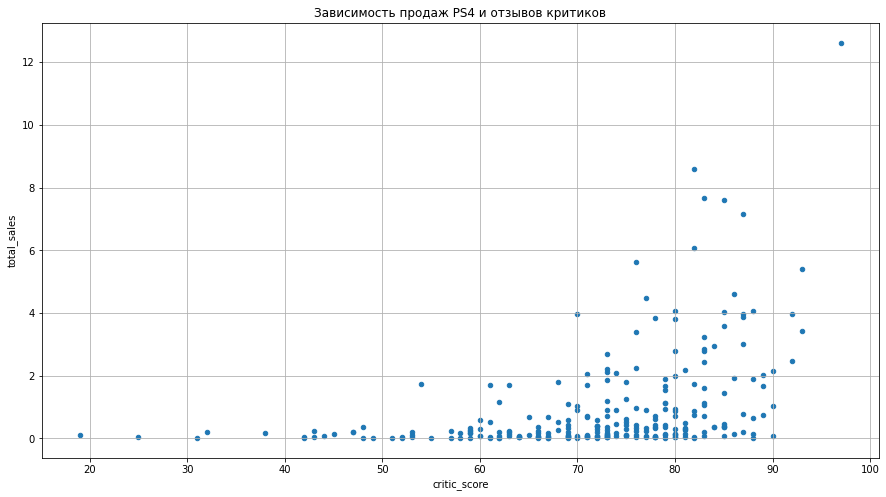

In [26]:
PS4.plot(x='critic_score', y='total_sales', kind='scatter', figsize = (15,8), grid=True, title='Зависимость продаж PS4 и отзывов критиков')

Исходя из построенных графиков можно сделать вывод, что зависимость продаж PS4 от отзывов пользователей практически отсутствует. Зависимость от отзывов критиков есть, но она слабая.

### Соотнесите выводы с продажами игр на других платформах

Напишу функцию для расчета зависимости между отзывами пользователей и продажами по 10 популярным платформам

In [27]:
def correlation(top):
    p = top['platform']
    p = p.values[0]
    c = top['total_sales'].corr(top['user_score'])
    print('Коэффициент корреляции Пирсона для платформы', p, '-', c, '\n')
    
    if c > 0.5:
        print('Наблюдается высокая линейная зависимость между отзывами пользователей и продажами')
    elif -0.5 < c < 0.5:
        print('Наблюдается слабая линейная зависимость между отзывами пользователей и продажами')
    else:
        print('Наблюдается отрицательная линейная зависимость между отзывами пользователей и продажами')
    bx = top.plot(x='user_score',
                  y='total_sales',
                  kind = 'scatter',
                  grid = True,
                  figsize=(5,4)
                 ) 
    bx.set_xlabel('Оценка пользователей')
    bx.set_ylabel('Продажи')

Коэффициент корреляции Пирсона для платформы Wii - 0.11283121360773771 

Наблюдается слабая линейная зависимость между отзывами пользователей и продажами


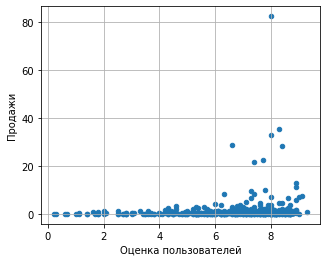

Коэффициент корреляции Пирсона для платформы DS - 0.13087600975844202 

Наблюдается слабая линейная зависимость между отзывами пользователей и продажами


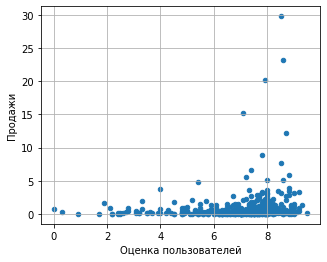

Коэффициент корреляции Пирсона для платформы X360 - 0.11418661214018049 

Наблюдается слабая линейная зависимость между отзывами пользователей и продажами


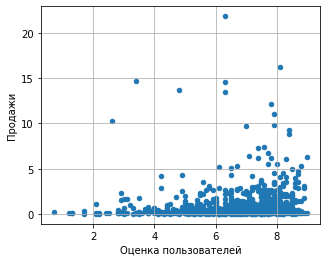

Коэффициент корреляции Пирсона для платформы PS3 - 0.12841562938563006 

Наблюдается слабая линейная зависимость между отзывами пользователей и продажами


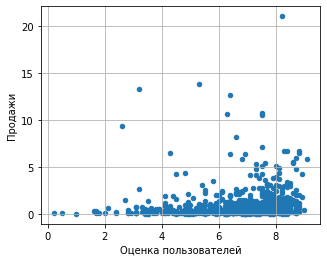

Коэффициент корреляции Пирсона для платформы PS2 - 0.1750550277038374 

Наблюдается слабая линейная зависимость между отзывами пользователей и продажами


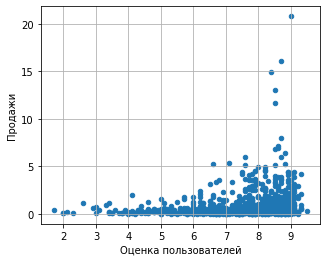

Коэффициент корреляции Пирсона для платформы GBA - 0.10614935050585159 

Наблюдается слабая линейная зависимость между отзывами пользователей и продажами


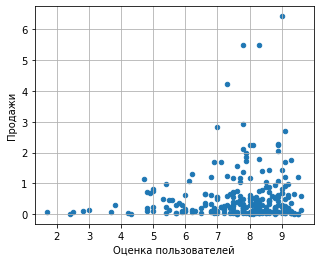

Коэффициент корреляции Пирсона для платформы PS4 - -0.031957110204556376 

Наблюдается слабая линейная зависимость между отзывами пользователей и продажами


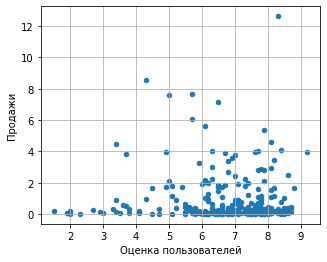

Коэффициент корреляции Пирсона для платформы 3DS - 0.22207843643390884 

Наблюдается слабая линейная зависимость между отзывами пользователей и продажами


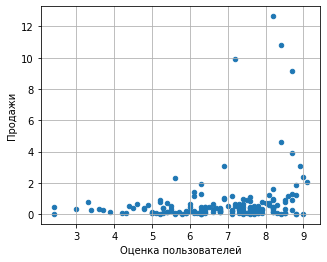

Коэффициент корреляции Пирсона для платформы PS - 0.30007753534409365 

Наблюдается слабая линейная зависимость между отзывами пользователей и продажами


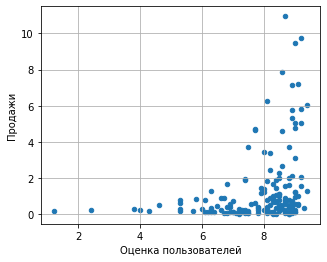

Коэффициент корреляции Пирсона для платформы PSP - 0.22089026723044386 

Наблюдается слабая линейная зависимость между отзывами пользователей и продажами


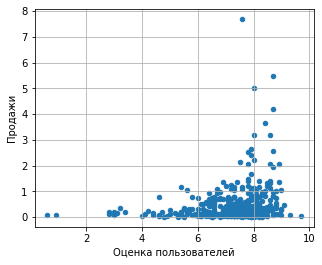

In [28]:
s = top['platform'].unique()
for a in s:
    correlation(top.query('platform == @a'))
    plt.show() 

Напишу функцию для расчета зависимости между отзывами критиков и продажами по 10 популярным платформам

In [29]:
def correlation(top):
    p = top['platform']
    p = p.values[0]
    c = top['total_sales'].corr(top['critic_score'])
    print('Коэффициент корреляции Пирсона для платформы', p, '-', c, '\n')
    
    if c > 0.5:
        print('Наблюдается высокая линейная зависимость между отзывами критиков и продажами')
    elif -0.5 < c < 0.5:
        print('Наблюдается слабая линейная зависимость между отзывами критиков и продажами')
    else:
        print('Наблюдается отрицательная линейная зависимость между отзывами критиков и продажами')
    bx = top.plot(x='critic_score',
                  y='total_sales',
                  kind = 'scatter',
                  grid = True,
                  figsize=(5,4)
                 ) 
    bx.set_xlabel('Оценка критиков')
    bx.set_ylabel('Продажи')

Коэффициент корреляции Пирсона для платформы Wii - 0.17790728577594905 

Наблюдается слабая линейная зависимость между отзывами критиков и продажами


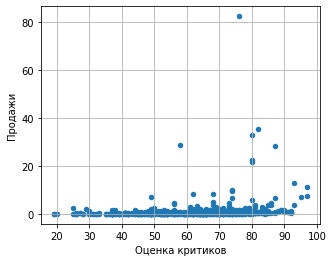

Коэффициент корреляции Пирсона для платформы DS - 0.23754579854113453 

Наблюдается слабая линейная зависимость между отзывами критиков и продажами


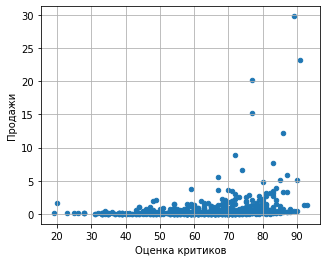

Коэффициент корреляции Пирсона для платформы X360 - 0.3928658925400695 

Наблюдается слабая линейная зависимость между отзывами критиков и продажами


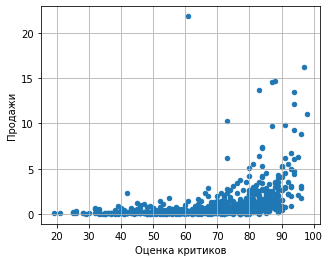

Коэффициент корреляции Пирсона для платформы PS3 - 0.4327589578997135 

Наблюдается слабая линейная зависимость между отзывами критиков и продажами


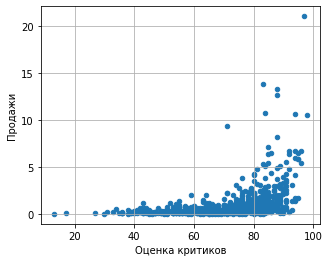

Коэффициент корреляции Пирсона для платформы PS2 - 0.39253647544509007 

Наблюдается слабая линейная зависимость между отзывами критиков и продажами


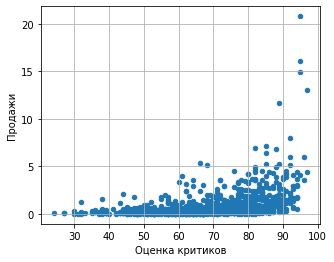

Коэффициент корреляции Пирсона для платформы GBA - 0.24210693503333322 

Наблюдается слабая линейная зависимость между отзывами критиков и продажами


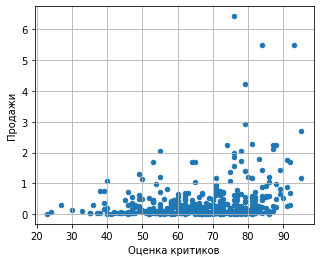

Коэффициент корреляции Пирсона для платформы PS4 - 0.406567902061781 

Наблюдается слабая линейная зависимость между отзывами критиков и продажами


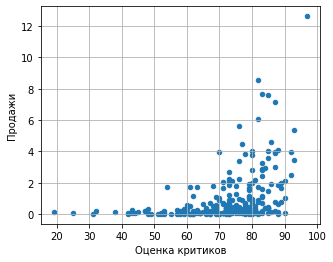

Коэффициент корреляции Пирсона для платформы 3DS - 0.34873973059848346 

Наблюдается слабая линейная зависимость между отзывами критиков и продажами


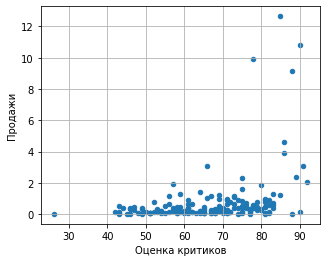

Коэффициент корреляции Пирсона для платформы PS - 0.44668977886705047 

Наблюдается слабая линейная зависимость между отзывами критиков и продажами


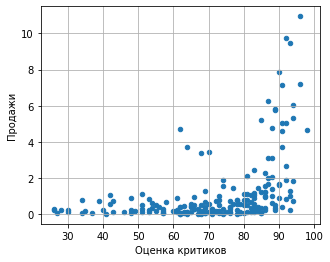

Коэффициент корреляции Пирсона для платформы PSP - 0.31752451005134863 

Наблюдается слабая линейная зависимость между отзывами критиков и продажами


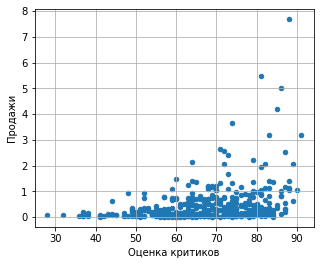

In [30]:
s = top['platform'].unique()
for a in s:
    correlation(top.query('platform == @a'))
    plt.show() 

Вывод: по всем платформам можно наблюдать слабую зависимость между отзывами и продажами. Где то она чуть выше, где то чуть ниже.

### Посмотрите на общее распределение игр по жанрам

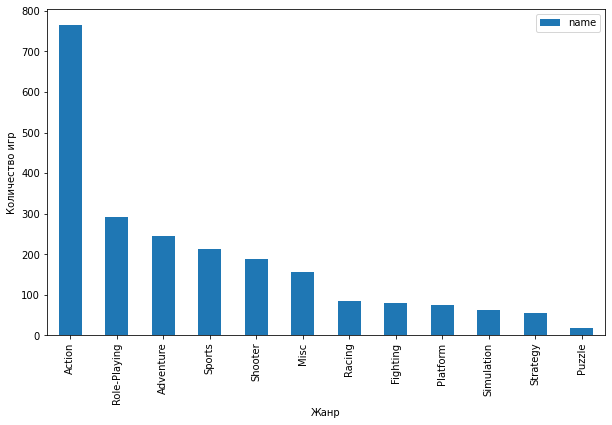

In [31]:
data.pivot_table(index ='genre', values = 'name', aggfunc='count').sort_values(by='name',
                                ascending=False).plot(kind='bar', figsize = (10,6)) # Найдем распределение игр по жанрам
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.show()

Судя по графику можно сказать что больше всего игр в жанре Action. Проверю распределение жанров по продажам

In [32]:
ac = data.pivot_table(index ='genre', values = 'total_sales', aggfunc=['median', 'mean']).reset_index()
ac.columns = ['genre', 'median_total_sales', 'mean_total_sales']
ac.sort_values(by='median_total_sales', ascending=False)

,genre,median_total_sales,mean_total_sales
8,Shooter,0.450,1.245882
10,Sports,0.240,0.703972
4,Platform,0.225,0.576081
7,Role-Playing,0.125,0.499623
2,Fighting,0.125,0.441375
6,Racing,0.120,0.469294
0,Action,0.110,0.420196
9,Simulation,0.100,0.350968
3,Misc,0.100,0.405290
11,Strategy,0.080,0.180000


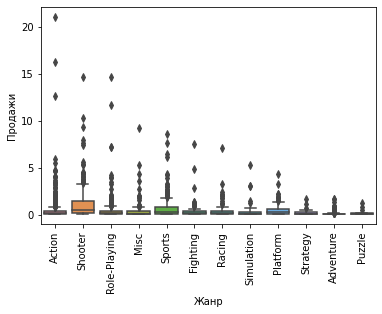

In [33]:
ax=sns.boxplot(data=data, x='genre', y='total_sales')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

На первом графике видны выбросы и редкие значения, обрежем усы на втором графике

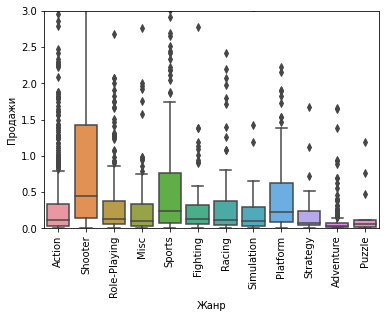

In [34]:
plt.ylim([0,3])
ax=sns.boxplot(data=data, x='genre', y='total_sales')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

Судя по таблице и диаграмме размаха можно сделать вывод что самый прибыльный жанр игр - Shooter, самый менее прибыльный - Puzzle. 

И хотя больше всего игр выпущено в жанре - Action, по медианным продажам он уступает жанру - Shooter более чем в 4 раза.

## Составьте портрет пользователя каждого региона

### Определите для пользователя каждого региона cамые популярные платформы (топ-5)

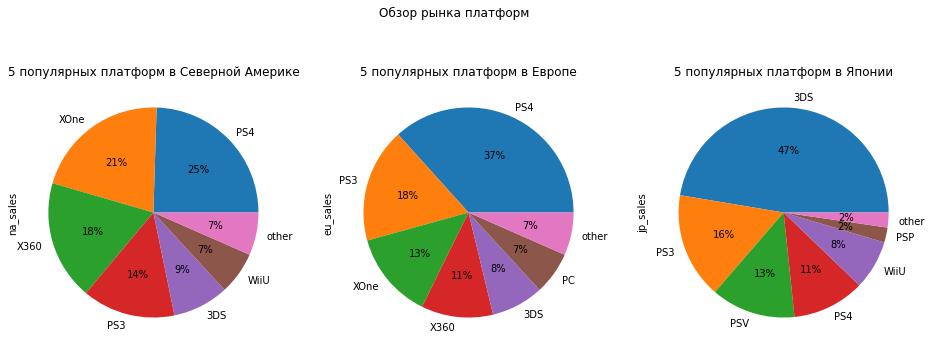

In [35]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,6))
fig.suptitle('Обзор рынка платформ')
top_na = data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(6)
top_na.loc['other'] = top_na.iloc[5:].sum()[0] # Платформы не входящие в топ 5 вынесем в отдельную группу Other
top_na.plot(kind='pie', subplots=True, legend=False, autopct='%.0f%%', ax=axes[0])

top_eu = data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(6)
top_eu.loc['other'] = top_eu.iloc[5:].sum()[0]# Платформы не входящие в топ 5 вынесем в отдельную группу Other
top_eu.plot(kind='pie', subplots=True, legend=False, autopct='%.0f%%', ax=axes[1])

top_jp = data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(6)
top_jp.loc['other'] = top_jp.iloc[5:].sum()[0]# Платформы не входящие в топ 5 вынесем в отдельную группу Other
top_jp.plot(kind='pie', subplots=True, legend=False, autopct='%.0f%%', ax=axes[2])
axes[0].set_title('5 популярных платформ в Северной Америке')
axes[1].set_title('5 популярных платформ в Европе')
axes[2].set_title('5 популярных платформ в Японии')
plt.show()

По графикам видно что в Европе и Северной Америке популярнее всего платформа PS4, однако в Японии самая популярная платформа это Nintendo 3DS. 

### Определите для пользователя каждого региона cамые популярные жанры (топ-5)

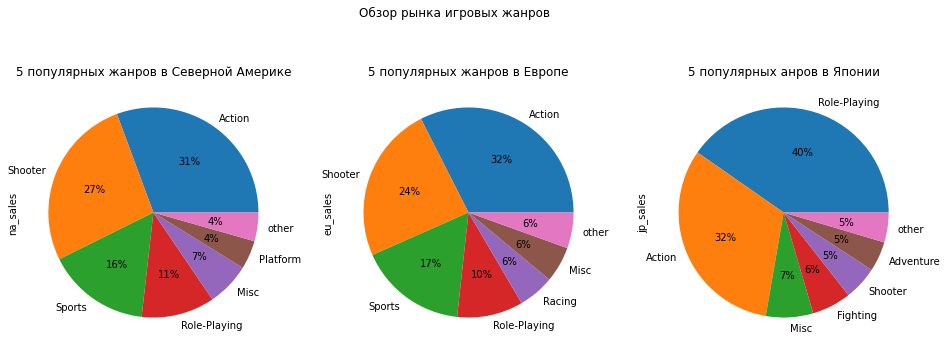

In [36]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,6))
fig.suptitle('Обзор рынка игровых жанров')
genre_na = data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(6)
genre_na.loc['other'] = genre_na.iloc[5:].sum()[0] # Жанры не входящие в топ 5 вынесем в отдельную группу Other
genre_na.plot(kind='pie', subplots=True, legend=False, autopct='%.0f%%', ax=axes[0])

genre_eu = data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(6)
genre_eu.loc['other'] = genre_eu.iloc[5:].sum()[0]# Жанры не входящие в топ 5 вынесем в отдельную группу Other
genre_eu.plot(kind='pie', subplots=True, legend=False, autopct='%.0f%%', ax=axes[1])

genre_jp = data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(6)
genre_jp.loc['other'] = genre_jp.iloc[5:].sum()[0]# Жанры не входящие в топ 5 вынесем в отдельную группу Other
genre_jp.plot(kind='pie', subplots=True, legend=False, autopct='%.0f%%', ax=axes[2])
axes[0].set_title('5 популярных жанров в Северной Америке')
axes[1].set_title('5 популярных жанров в Европе')
axes[2].set_title('5 популярных анров в Японии')
plt.show()

По графикам видно что в Европе и Северной Америке популярнее всего игры в жанре Action, а в Японии самый популярный жанр игр это Role-Playing, а Action на втором месте по популярности.

### Влияние рейтинга ESRB на продажи в регионах

In [37]:
data = data.dropna(subset = ['rating'])
# Удалю пропуски в rating

 **Значения рейтинга ESRB:**
 
«E» («Everyone») — «Для всех»

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.

«M» («Mature») — «Для взрослых»: Игра подходит для лиц от 17 лет.

Unknown - рейтинг отсутствует

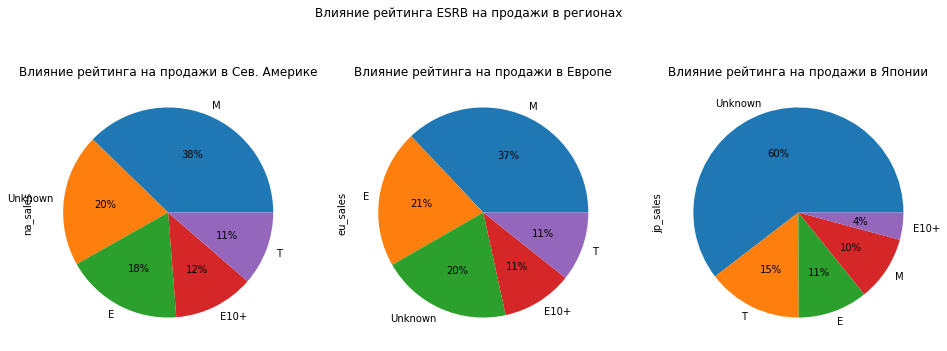

In [38]:
data = data.dropna(subset = ['rating'] )
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,6))
fig.suptitle('Влияние рейтинга ESRB на продажи в регионах')
rating_na = data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
rating_na.plot(kind='pie', subplots=True, legend=False, autopct='%.0f%%', ax=axes[0])

rating_eu = data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
rating_eu.plot(kind='pie', subplots=True, legend=False, autopct='%.0f%%', ax=axes[1])

rating_jp = data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
rating_jp.plot(kind='pie', subplots=True, legend=False, autopct='%.0f%%', ax=axes[2])
axes[0].set_title('Влияние рейтинга на продажи в Сев. Америке')
axes[1].set_title('Влияние рейтинга на продажи в Европе')
axes[2].set_title('Влияние рейтинга на продажи в Японии')
plt.show()

По графикам видно что в Северной Америке и Европе больше всего продаж игр с рейтингом «M» — «Для взрослых»: Игра подходит для лиц от 17 лет, при этом 20 % игр не имеют рейтинга. В Японии 60 % игр не имеют рейтинга ESRB(т.к в основном он предназначен для маркировки игр для США и Канады). Поэтому нельзя с уверенностью сказать что рейтинг ESRB сильно влияет на продажи.

## Проверьте гипотезы

### Проверить гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Гипотеза о равенстве средних двух генеральных совокупностей

Буду применять метод st.ttest_ind - он проверяет средние двух совокупностей на равенство.

**Нулевая гипотеза H₀:** Средние пользовательские рейтинги платформ Xbox One и PC равны

**Альтернативная гипотеза H₁:** Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [39]:
data.pivot_table(index ='platform', values = 'user_score', aggfunc='mean').sort_values(by='user_score', ascending=False).reset_index().head(7)

,platform,user_score
0,PSV,7.527273
1,WiiU,7.017500
2,3DS,6.976250
3,PS4,6.748249
4,XOne,6.521429
5,PS3,6.348387
6,PC,6.269677


In [40]:
XOne_full = data.query('(user_score >= 0) & (platform == "XOne")&(~user_score.isna())')['user_score']
PC_full = data.query('(user_score >= 0) & (platform == "PC")&(~user_score.isna())')['user_score']

results = st.ttest_ind(XOne_full, PC_full, equal_var=False) # results = вызов метода для проверки гипотезы
alpha = .05 # alpha = задаем значение уровня значимости

print('p-value:', results.pvalue) # вывод значения p-value на экран 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
# условный оператор с выводом строки с ответом

p-value: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу. Это не значит, что рейтинги одинаковые, а что на основании имеющихся данных опровергнуть их одинаковость не удалось

### Проверить гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные

Гипотеза о равенстве средних двух генеральных совокупностей

Буду применять метод st.ttest_ind - он проверяет средние двух совокупностей на равенство.

**Нулевая гипотеза H₀:** Средние пользовательские рейтинги жанров Action и Sports равны


**Альтернативная гипотеза H₁:** Средние пользовательские рейтинги жанров Action и Sports не равны

In [41]:
data.pivot_table(index ='genre', values = 'user_score', aggfunc='mean').sort_values(by='user_score', ascending=False).reset_index()

,genre,user_score
0,Puzzle,7.471429
1,Adventure,7.461667
2,Role-Playing,7.376471
3,Fighting,7.037500
4,Misc,6.975000
5,Action,6.837532
6,Platform,6.713793
7,Shooter,6.342308
8,Strategy,6.183333
9,Racing,6.080000


In [42]:
action_full = data.query('(user_score >= 0) & (genre == "Action")&(~user_score.isna())')['user_score']
sports_full = data.query('(user_score >= 0) & (genre == "Sports")&(~user_score.isna())')['user_score']

results = st.ttest_ind(action_full, sports_full, equal_var=False) # results = вызов метода для проверки гипотезы
alpha = 0.05 # alpha = задаем значение уровня значимости

print('p-value:', results.pvalue) # вывод значения p-value на экран 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
# условный оператор с выводом строки с ответом

p-value: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports разные, p-value = 1.44, отвергаем нулевую гипотезу.

## Общий вывод

В результате выполения проекта мной были изучены предоставленные данные о продажах игр для различных игровых консолей, оценки пользователей и экспертов, жанры игр и различные виды игровых платформ. Была выполнена предобработка предоставленных данных: найдены и устранены пропуски, дубликаты, аномальные и выбивающиеся значения. Проведен исследовательский анализ данных и выявлено что:
1. С годами ощущалась разница в количестве выпускаемых игр в год разными компаниями. Количество выпускаемых игр в год росло с каждым годом с 1980 по 2008 год, после начался медленный спад.
2. Продажи по платформам тоже постоянно менялись, платформа SP2 занимает на данный момент первую строчку рейтинга по суммарным продажам за все года.
3. Если брыть последний актуальный период с 2013 по 2016 год, то по продажам лидируют платформы PS4 и XOne.
4. Цикл жизни платформ в среднем стоставляет около 10 лет. 
5. Зависимость между отзывами пользователей и критиков прослеживается очень слабо, отзывы почти не влияют на продажи.
6. Если анализировать самые популярные жанры игр, то лидирует жанр Action, самый непопулярный жанр - Puzzle.
7. За последний актуальный период с 2013 по 2016 год самая популярная платформа в Европе и Северной Америке - PS4, в Японии это Nintendo 3DS.
8. Самый популярный жанр игр в Европе и Северной Америке - это Action, а в Японии это - Role-Playing.
9. На основании рейтинга ESRB в Европе и Северной Америке больше всего продаж игр с рейтингом «M» — «Для взрослых»: для лиц от 17 лет. В Японии больше всего продаж игр с рейтингом «T» — «Подросткам»: для лиц от 13 лет.

На основе проведенного мной анализа, вы можете учесть закономерности определяющие успешность игры и спланировать рекламные кампании на следующие года для потенциально популярных продуктов.